In [2]:
import requests
import pandas as pd

<h2>Using requests and BeautifulSoup to make a list of all the CORGIS datasets</h2>

In [3]:
response = requests.get('https://corgis-edu.github.io/corgis/csv/')
response

<Response [200]>

In [4]:
from bs4 import BeautifulSoup

In [5]:
# Save all the html in a string variable
html_string = response.text

In [6]:
# Use BeautifulSoup to create a list of all the CORIGS datasets
document = BeautifulSoup(html_string, 'html.parser')
datasets = []

for dataset in document.find_all('h3'):
    dataset = str(dataset.text)
    datasets.append(dataset)

datasets

['Aids',
 'Airlines',
 'Billionaires',
 'Broadway',
 'Business Dynamics',
 'Cancer',
 'Cars',
 'Classics',
 'Construction Permits',
 'Construction Spending',
 'County Demographics',
 'Covid',
 'Drugs',
 'Earthquakes',
 'Election',
 'Electricity',
 'Emissions',
 'Energy',
 'Finance',
 'Food',
 'Food Access',
 'Global Development',
 'Graduates',
 'Health',
 'Hospitals',
 'Hydropower',
 'Ingredients',
 'Injuries',
 'Labor',
 'Medal Of Honor',
 'Music',
 'Opioids',
 'Police Shootings',
 'Publishers',
 'Real Estate',
 'Retail Services',
 'School Scores',
 'Skyscrapers',
 'Slavery',
 'State Crime',
 'State Demographics',
 'State Fragility',
 'Suicide Attacks',
 'Supreme Court',
 'Tate',
 'Video Games',
 'Weather',
 'Wind Turbines']

<h3>Function to take a respective CORIGS dataset, search for the CORGIS download link, and returns a Pandas dataframe.</h3>

In [7]:
def pdcorgis(a):
    # Convert string to lowercase
    a = a.lower()
    
    # Get the dataset HTML 
    response = requests.get("https://corgis-edu.github.io/corgis/csv/" + a + "/")
    html_string = response.text
    
    # Search for all HTML links
    document = BeautifulSoup(html_string, 'html.parser')
    links = document.find_all('a')
    
    # Search for download link
    download_link = "https://corgis-edu.github.io/corgis/csv/" + a + "/"
    for link in links:
        if link.has_attr('download'):
            download_link += link['href']
    
    download_link = download_link.replace(' ', '_')
    # Return CORGIS dataset
    corgisdf = pd.read_csv(download_link)
    return corgisdf
    

<AxesSubplot:xlabel='Year'>

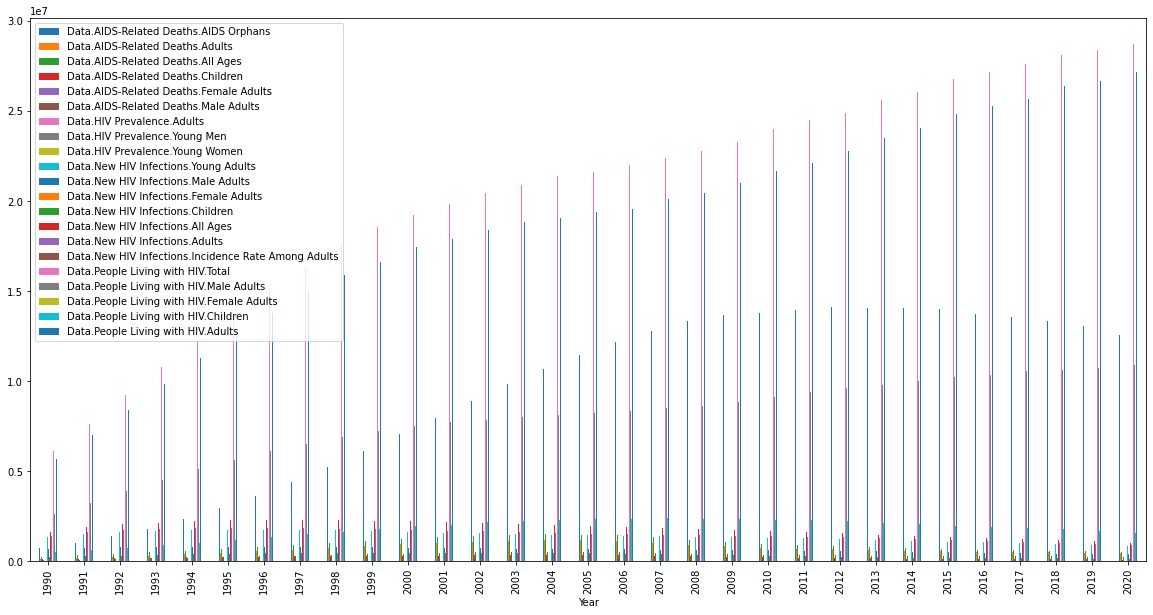

In [8]:
df = pdcorgis("AIDS")
df.head()
df = df.groupby(['Year']).sum()
df.head()
df.plot(kind='bar', figsize=(20,10))

<AxesSubplot:title={'center':'Average number of Cancelled Flights over Time'}, xlabel='Time.Year'>

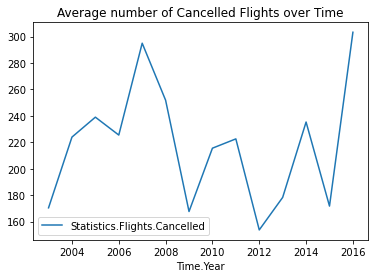

In [9]:
df = pdcorgis("Airlines")
df.head()
df = df.groupby(['Time.Year']).mean()
df.plot(kind='line', y='Statistics.Flights.Cancelled', title='Average number of Cancelled Flights over Time')

[Text(0.5, 0, 'Dimensions.Height')]

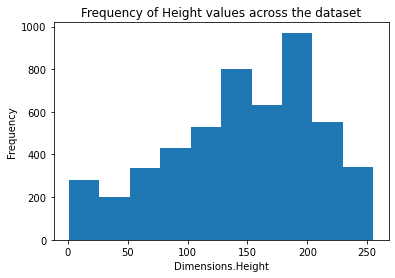

In [13]:
df = pdcorgis("Cars")
df.head()
ax = df['Dimensions.Height'].astype('float').plot.hist(title='Frequency of Height values across the dataset')
ax.set(xlabel='Dimensions.Height')